<a href="https://colab.research.google.com/github/zeynepnua/hu-bby261-2020/blob/main/proje_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2155 - accuracy: 0.9361
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0876 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0609 - accuracy: 0.9804
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0470 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0377 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0296 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0254 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0228 - accuracy: 0.9926
Ep

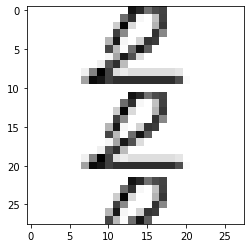

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

model.evaluate(x_test, y_test)

from PIL import Image
import numpy as np

png = Image.open("/content/Adsız.png").convert("L")
png = np.resize(png, (28,28,1))
pngBinary = np.array(png)
plt.imshow(pngBinary.reshape(28, 28),cmap='gray')

modeltahmin = model.predict(pngBinary.reshape(1, 28, 28, 1))
sayıtahmin = np.argmax(model.predict(pngBinary.reshape(1, 28, 28, 1)), axis=-1)

print(modeltahmin)
print(sayıtahmin)